# Binding site similarity and off-target prediction

Developed in the CADD seminars 2017 and 2018, Volkamer lab, Charité/FU Berlin 

Authors:

- Angelika Szengel
- Marvis Sydow
- Richard Gowers
- Jaime Rodríguez-Guerra, Volkamer lab, Charité
- Dominique Sydow, Volkamer lab, Charité

__Talktorial T10__: This talktorial is part of the TeachOpenCADD pipeline described in the [first TeachOpenCADD paper](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-019-0351-x), comprising of talktorials T1-T10.

**Note**: Please run this notebook cell by cell. Running all cells in one is possible also, however, part of the `nglview` 3D representations might be missing.

## Aim of this talktorial

In this talktorial, we use the structural similarity of whole proteins and binding sites to predict off-targets, i.e. proteins that are not intended targets of a drug, which may lead to unwanted side effects or enable desired alternate applications of a drug (drug repositioning).
We discuss the main steps for binding site comparison and implement a basic method, i.e. the geometrical variation between structures (the root mean square deviation of two structures).

## Learning goals

### Theory

* Off-target proteins
* Computational off-target prediction: binding site comparison
* Pairwise RMSD as simple measure for similarity
* Imatinib, a tyrosine kinase inhibitor

### Practical

* Load and visualize the ligand of interest (Imatinib/STI)
* Get all protein-STI complexes from the PDB
  * Query the PDB
  * Filter the PDB data set
  * Save the filtered PDB IDs
* Visualize the PDB structures
* Align the PDB structures (whole protein)
* Get pairwise RMSD (whole protein)
* Align the PDB structures (binding site)
* Get pairwise RMSD (binding site)

## References

Binding site superposition + comparison: 

* Binding site comparison reviews: 
([<i>Curr. Comput. Aided Drug Des. </i> (2008), <b>4</b>, 209-20](https://www.eurekaselect.com/67606/article/how-measure-similarity-between-protein-ligand-binding-sites)) 
and 
([<i>J. Med. Chem. </i> (2016), <b>9</b>, 4121-51](https://pubs.acs.org/doi/10.1021/acs.jmedchem.6b00078))
<!-- TODO: This might not be needed -->
* Molecular superposition with Python: [`opencadd`](https://github.com/volkamerlab/opencadd) (`structure.superposition` module)
* Wikipedia article on root mean square deviation (RMSD) 
([Wikipedia: RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)) and structural superposition ([Wikipedia: structural superposition](https://en.wikipedia.org/wiki/Structural_alignment))
* Structural superposition ([Book chapter: Algorithms, Applications, and Challenges of Protein Structure Alignment in *Advances in Protein Chemistry and Structural Biology* (2014), **94**, 121-75](https://www.sciencedirect.com/science/article/pii/B9780128001684000056?via%3Dihub))

Imatinib:  

* Review on Imatinib 
([<i>Nat. Rev. Clin. Oncol.</i> (2016), <b>13</b>, 431-46](https://www.nature.com/articles/nrclinonc.2016.41))
* Promiscuity of imatinib 
([<i>J. Biol.</i> (2009), <b>8</b>, 10.1186/jbiol134](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2689438/))
* ChEMBL information on Imatinib 
([ChEMBL: Imatinib](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941))
* PDB information on Imatinib 
([PDB: STI](https://www3.rcsb.org/ligand/STI))
* Side effects of Imatinib
([Drugs.com: Imatinib](https://www.drugs.com/cdi/imatinib.html))
* Side effects of Imatinib
 ([<i>BMC Struct. Biol.</i> (2009), <b>9</b>, 10.1186/1472-6807-9-7](https://bmcstructbiol.biomedcentral.com/articles/10.1186/1472-6807-9-7))

## Theory

### Off-target proteins

An off-target can be any protein which interacts with a drug or (one of) its metabolite(s) without being the designated target protein. 
The molecular reaction caused by the off-target can lead to unwanted side effects, ranging from a rather harmless to extremely harmful impact. 
Off-targets mainly occur because on- and off-targets share similar structural motifs with each other in their binding site and therefore can bind similar ligands. 

### Computational off-target prediction: binding site comparison

Computation-aided prediction of potential off-targets is aimed at minimizing the risk of developing potentially dangerous substances for medical treatment.
There are several algorithmic approaches to assess binding site similarity but they always consist of three main steps:

1. **Binding site encoding**: binding sites are encoded using different descriptor techniques and stored in a target database.
2. **Binding site comparison**: a query binding site is compared with the target database, using different similarity measures.
3. **Target ranking**: targets are ranked based on a suitable scoring approach.

For detailed information on different similarity measures and existing tools, we refer to two excellent reviews on binding site comparison ([<i>Curr. Comput. Aided Drug Des. </i> (2008), <b>4</b>, 209-20](https://www.eurekaselect.com/67606/article/how-measure-similarity-between-protein-ligand-binding-sites) and [<i>J. Med. Chem. </i> (2016), <b>9</b>, 4121-51](https://pubs.acs.org/doi/10.1021/acs.jmedchem.6b00078)).

<img src="images/binding_site_comparison_steps.png" align="above" alt="Image cannot be shown" width="700">
<div align="center"> Figure 1: Main steps of binding site comparison methods (figure by Dominique Sydow).</div>

### Pairwise RMSD as simple measure for similarity

A simple and straightforward method for scoring the similarity is to use the calculated root mean square deviation (RMSD), which is the square root of the mean of the square of the distances between the atoms of two aligned structures ([Wikipedia: RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)). 


In order to find the respective atoms that are compared between two structures, they need to be aligned first based on sequence-based or sequence-independent alignment algorithms ([Book chapter: Algorithms, Applications, and Challenges of Protein Structure Alignment in *Advances in Protein Chemistry and Structural Biology* (2014), **94**, 121-75](https://www.sciencedirect.com/science/article/pii/B9780128001684000056?via%3Dihub)).




### Imatinib, a tyrosine kinase inhibitor

Kinases transfer a phosphate group from ATP to proteins, and thereby regulate various cellular processes such as signal transduction, metabolism, and protein regulation.
If these kinases are constitutively active (due to genomic mutations), they can distort regulation processes and cause cancer.
An example for cancer treatment is Imatinib ([<i>Nat. Rev. Clin. Oncol.</i> (2016), <b>13</b>, 431-46](https://www.nature.com/articles/nrclinonc.2016.41)), a small molecule tyrosine kinase inhibitor used to treat cancer, more specifically chronic myeloid leukaemia (CML) and gastrointestinal stromal tumour (GIST). 

Imatinib was shown to be not entirely specific and to target tyrosine kinases other than its main target. This was used for drug repositioning, i.e. Imatinib was approved for alternate cancer types, ([<i>J. Biol.</i> (2009), <b>8</b>, 10.1186/jbiol134](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2689438/)), however can also show unwanted side effects such as signs of an allergic reaction, infection, bleeding, or headache ([Drugs.com: Imatinib](https://www.drugs.com/cdi/imatinib.html)).

## Practical

In the following, we will fetch and filter PDB structures that bind Imatinib. We will investigate the structure similarity of Imatinib-binding proteins (those with a solved protein structure). 
The similarity measure used is a pairwise RMSD calculation (as a simple similarity measure), in order to show that this simple method can be used as an initial test for potential off-targets.

In [1]:
import os
import pprint
import pickle
import glob
import time

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, AllChem
IPythonConsole.ipython_useSVG=True

import nglview as nv

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from pypdb import *
from biopandas.pdb import PandasPdb

### Load and visualize the ligand of interest (Imatinib/STI)

The SMILES format for Imatinib (common abbreviation: STI) can be retrieved from e.g. the ChEMBL database 
([ChEMBL: Imatinib](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941)) 
or the PDB database by its common abbreviation STI 
([PDB: STI](https://www3.rcsb.org/ligand/STI)). 
We simply copy the string from the "Isomeric SMILES" entry of the Chemical Component Summary table, and load the ligand here by hand.

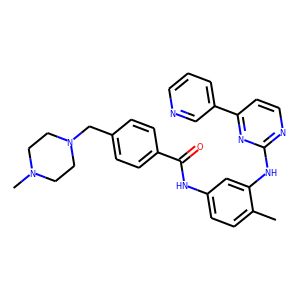

In [2]:
sti = Chem.MolFromSmiles('CN1CCN(Cc2ccc(cc2)C(=O)Nc2ccc(C)c(Nc3nccc(n3)-c3cccnc3)c2)CC1')
Draw.MolToImage(sti)

In order to inspect the 3D structure of STI, we use the open source tool NGLView. 
Before we can view STI in NGLView, we need to compute its 3D coordinates.

First, we add hydrogen atoms to the molecule, which are not always explicitly denoted in the SMILES format.
Second, we use the distance geometry to obtain initial coordinates for the molecule and optimize the structure of the molecule using the force field UFF (Universal Force Field).

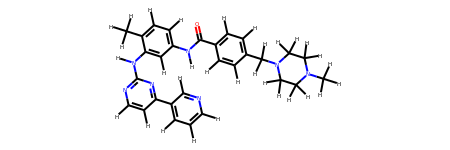

In [3]:
sti_mol = Chem.AddHs(sti)
sti_mol

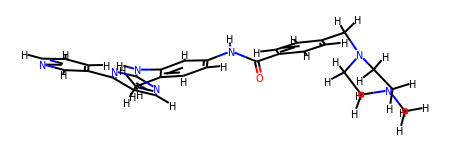

In [4]:
AllChem.EmbedMolecule(sti_mol)
AllChem.UFFOptimizeMolecule(sti_mol)
sti_mol

Now, we are ready to roll in nglview! 


In [5]:
v = nv.show_rdkit(sti_mol)
v

NGLWidget()

In [6]:
v.render_image();

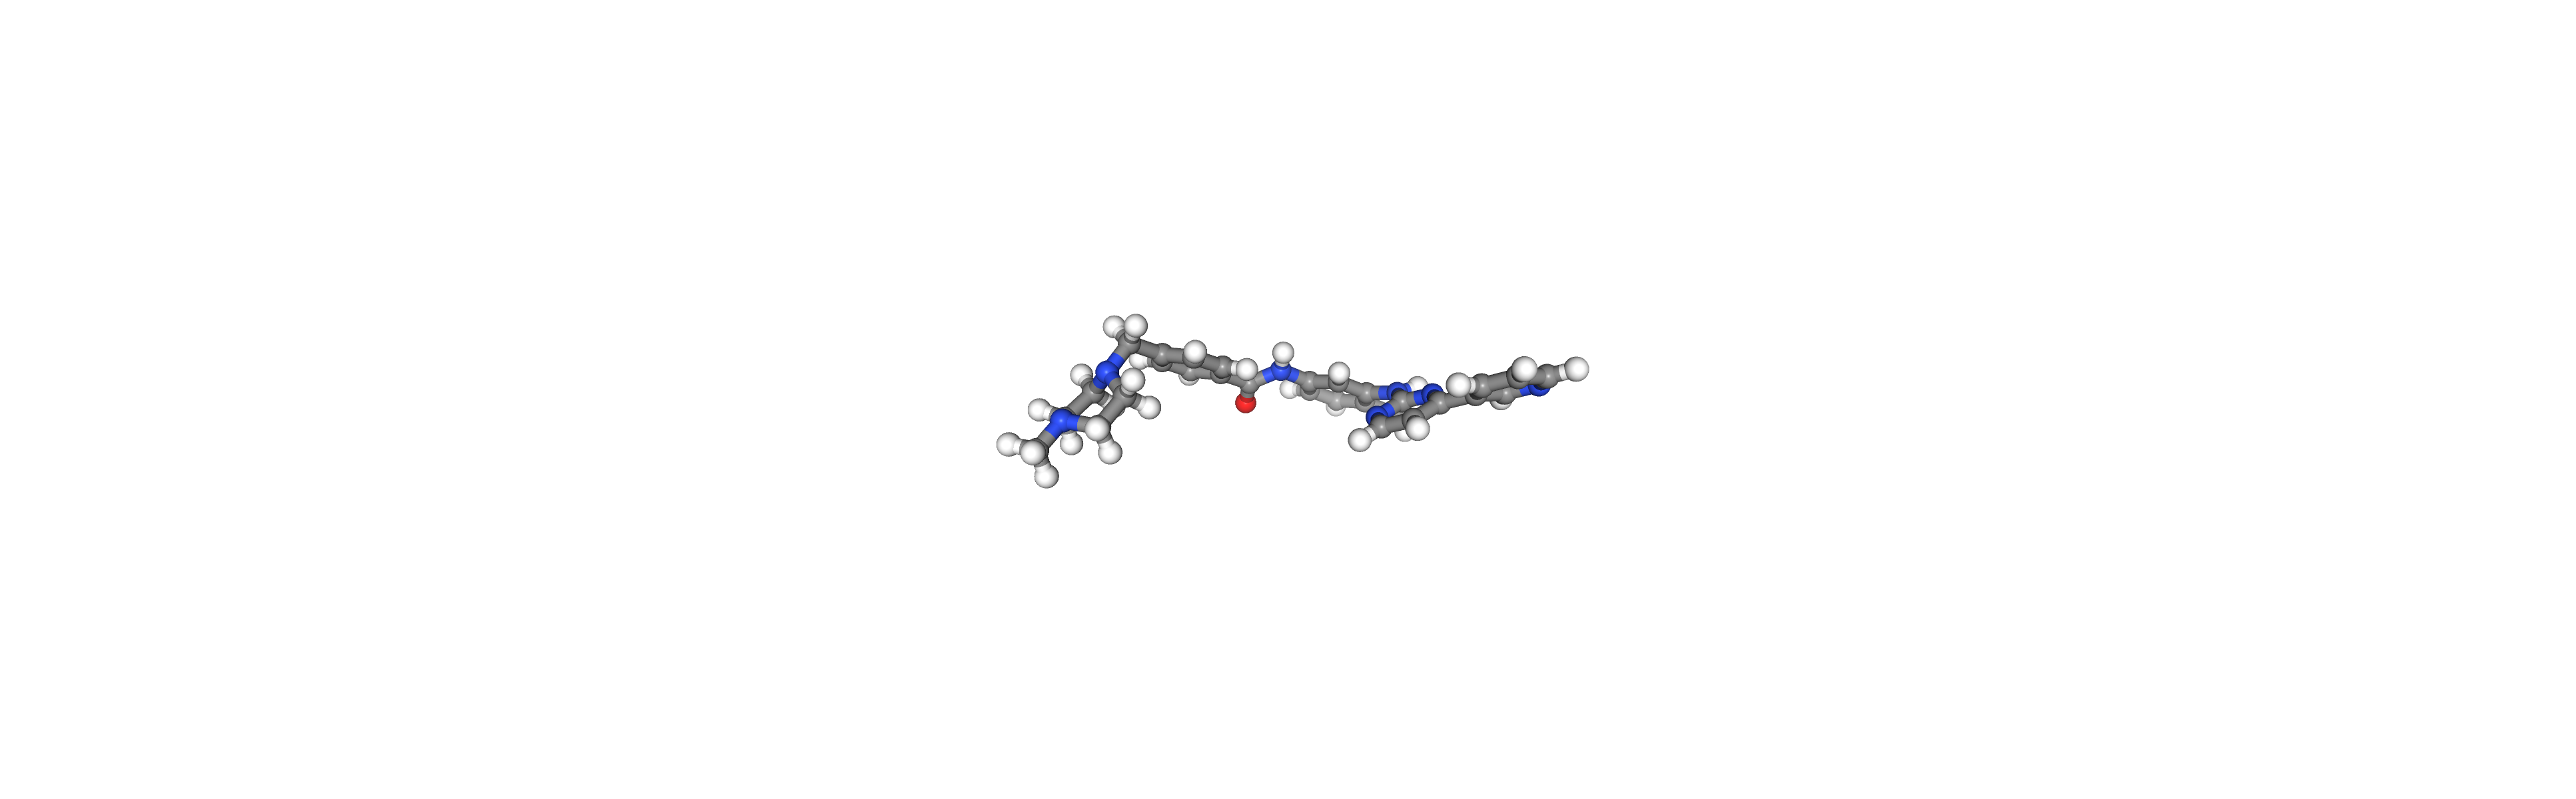

In [7]:
v._display_image()

### Get all protein-STI complexes from the PDB

We can look up Imatinib/STI in open databases like the PDB and search for proteins which are reported targets. In the PDB, Imatinib is usually abbreviated by STI. We will search for both terms and merge the results in the following.

#### Query the PDB

First, we retrieve all proteins from the PDB that bind the ligand of interest (STI).

In [8]:
search_dict = make_query('STI')  # Query PDB for proteins bound to the ligand STI
found_pdb_ids = do_search(search_dict)

print(*found_pdb_ids)
print("\nNumber of structures connected with STI in the PDB:", len(found_pdb_ids))

1AVU 1AVW 1AVX 1BA7 1FPU 1IEP 1M52 1OPJ 1R8N 1R8O 1T45 1T46 1XBB 2BEA 2BEB 2DRE 2ESU 2ET2 2HYY 2OIQ 2PL0 3EA7 3EA8 3FW1 3GVU 3HEC 3I2A 3I2X 3K5V 3M3V 3MS9 3MSS 3OEZ 3PYY 3QQM 3S8J 3S8K 4BKJ 4CSV 4GCN 4GCO 4H9W 4HA2 4R7I 4TLP 5FNW 5FNX 5FZU 5FZY 5FZZ 5G00 5MQT 6HD4 6HD6 6I0I 6JOL 6KTN 6NPE 6NPU 6NPV 6OTU 6VXH 6WE5

Number of structures connected with STI in the PDB: 63


Note that the query results can differ depending on the term used for the query ligand (here: Imatinib). 

In [9]:
search_dict2 = make_query('Imatinib')  # Query PDB for proteins bound to the ligand Imatinib
found_pdb_ids2 = do_search(search_dict2)

print(*found_pdb_ids2)
print("\nNumber of structures connected with Imatinib in the PDB:", len(found_pdb_ids2))

1IEP 1M52 1OPJ 1T46 1XBB 2F4J 2GQG 2HYY 2OIQ 2PL0 2XYN 3EL7 3EL8 3FW1 3G0E 3G0F 3G6G 3G6H 3GVU 3HEC 3HEG 3K5V 3MS9 3MSS 3OEZ 3OF0 3PYY 3QLF 3QLG 4BKJ 4CSV 4R7I 5MQT 6HD4 6HD6 6JOL 6KTM 6KTN 6NPE 6NPU 6NPV 6VXH

Number of structures connected with Imatinib in the PDB: 42


We merge both query results and keep only unique entries.

In [10]:
pdb_ids = list(set(found_pdb_ids + found_pdb_ids))
print("Number of structures connected with STI/Imatinib in the PDB:", len(pdb_ids))

Number of structures connected with STI/Imatinib in the PDB: 63


#### Filter the PDB data set

We retrieve meta information on the PDB structures using the `pypdb` function `get_entity_info`, in order to filter the data set based on the following criteria:

1. Filter by experimental method (`xray`).
2. Filter by resolution (equal or lower than 3 &#8491;).
3. Retain only PDB structures with a single chain (for simplicity).
4. Retain only Imatinib-bound structures (e.g. some PDB structures are returned that are associated with Imatinib but not bound to it).
5. Retain only PDB IDs deposited before 2019 (data set resource at the time of the talktorial publication).

For more info on how to query the PDB see **talktorial 8**.

In [11]:
# Get meta information from the PDB
entity_info = []
for pdb_id in pdb_ids:
    entity_info.append(get_entity_info(pdb_id))
entity_info[0]

{'Method': {'@name': 'xray'},
 'Entity': {'@id': '1',
  '@type': 'protein',
  'Chain': [{'@id': 'A'}, {'@id': 'B'}]},
 'structureId': '3MS9',
 'bioAssemblies': '2',
 'release_date': 'Wed May 26 00:00:00 PDT 2010',
 'resolution': '1.80'}

In [12]:
# Transform list to DataFrame
entity_info_pd = pd.DataFrame(entity_info)
a = [int(i.split()[5]) for i in entity_info_pd["release_date"].tolist()]
entity_info_pd.head()

Method                                             Entity  \
0  {'@name': 'xray'}  {'@id': '1', '@type': 'protein', 'Chain': [{'@...   
1  {'@name': 'xray'}  [{'@id': '1', '@type': 'protein', 'Chain': {'@...   
2  {'@name': 'xray'}  [{'@id': '1', '@type': 'protein', 'Chain': {'@...   
3  {'@name': 'xray'}  {'@id': '1', '@type': 'protein', 'Chain': [{'@...   
4  {'@name': 'xray'}  {'@id': '1', '@type': 'protein', 'Chain': [{'@...   

  structureId bioAssemblies                  release_date resolution  
0        3MS9             2  Wed May 26 00:00:00 PDT 2010       1.80  
1        1AVW             1  Wed Oct 28 00:00:00 PST 1998       1.75  
2        1AVX             1  Wed Oct 28 00:00:00 PST 1998       1.90  
3        3PYY             2  Wed Mar 09 00:00:00 PST 2011       1.85  
4        6NPU             1  Wed Mar 13 00:00:00 PDT 2019       2.33

In [13]:
# 1. Filter by experimental method
entity_info_pd = entity_info_pd[entity_info_pd["Method"] == {'@name': 'xray'}]

# 2. Filter by resolution
entity_info_pd = entity_info_pd[entity_info_pd["resolution"].astype(float) <= 3.0]

# 3. Retain only structures with a single chain (for simplicity)
entity_info_pd = entity_info_pd[[isinstance(i, dict) for i in entity_info_pd["Entity"]]]
entity_info_pd = entity_info_pd[[isinstance(i["Chain"], dict) for i in entity_info_pd["Entity"]]]

pdb_ids = entity_info_pd["structureId"].tolist()

print("Number of structures after filtering: ", len(pdb_ids))

Number of structures after filtering:  24


In the following, we will use a package called `BioPandas`, which provides useful functions to load molecular structures of biological macromolecules (from PDB and MOL2 files) in pandas DataFrames. We will use the `PandasPdb` object to facilitate our work with PDB files.

In [14]:
# 4. Retain only Imatinib-bound structures

def check_if_ligand_present(pdb_id, ligand_name):
    ppdb = PandasPdb().fetch_pdb(pdb_id)  # Fetch PDB (atom info, coordinates)
    return sum(ppdb.df["HETATM"]["residue_name"] == ligand_name) > 0  # Check for existence of STI entries

entity_info_pd = entity_info_pd[[check_if_ligand_present(pdb_id, "STI") for pdb_id in pdb_ids]]  # Apply function

pdb_ids = entity_info_pd["structureId"].tolist()

print("Number of structures after filtering: ", len(pdb_ids))

Number of structures after filtering:  9


In [15]:
# 5. Retain only PDB IDs deposited before 2019

entity_info_pd = entity_info_pd[[int(i.split()[5]) < 2019 for i in entity_info_pd["release_date"].tolist()]]

pdb_ids = entity_info_pd["structureId"].tolist()

print("Number of structures after filtering: ", len(pdb_ids))

Number of structures after filtering:  8


In [16]:
# 6. After manual visual inspection remove 3GVU (contains 2x STI: not feasible for the automated workflow below)
pdb_ids.remove("3GVU")

In [17]:
print(*pdb_ids)
#pdb_ids = random.shuffle(pdb_ids)  # In case you would like to change the order of IDs

3HEC 2PL0 4CSV 4R7I 1XBB 3FW1 1T46


### Visualize the PDB structures

First, we load all structures in NGLView for visual inspection of the 3D structure of the protein data set. 

In [18]:
view = nv.NGLWidget()
for pdb_id in pdb_ids:
    view.add_pdbid(pdb_id)
view

NGLWidget()

In [19]:
view.render_image();

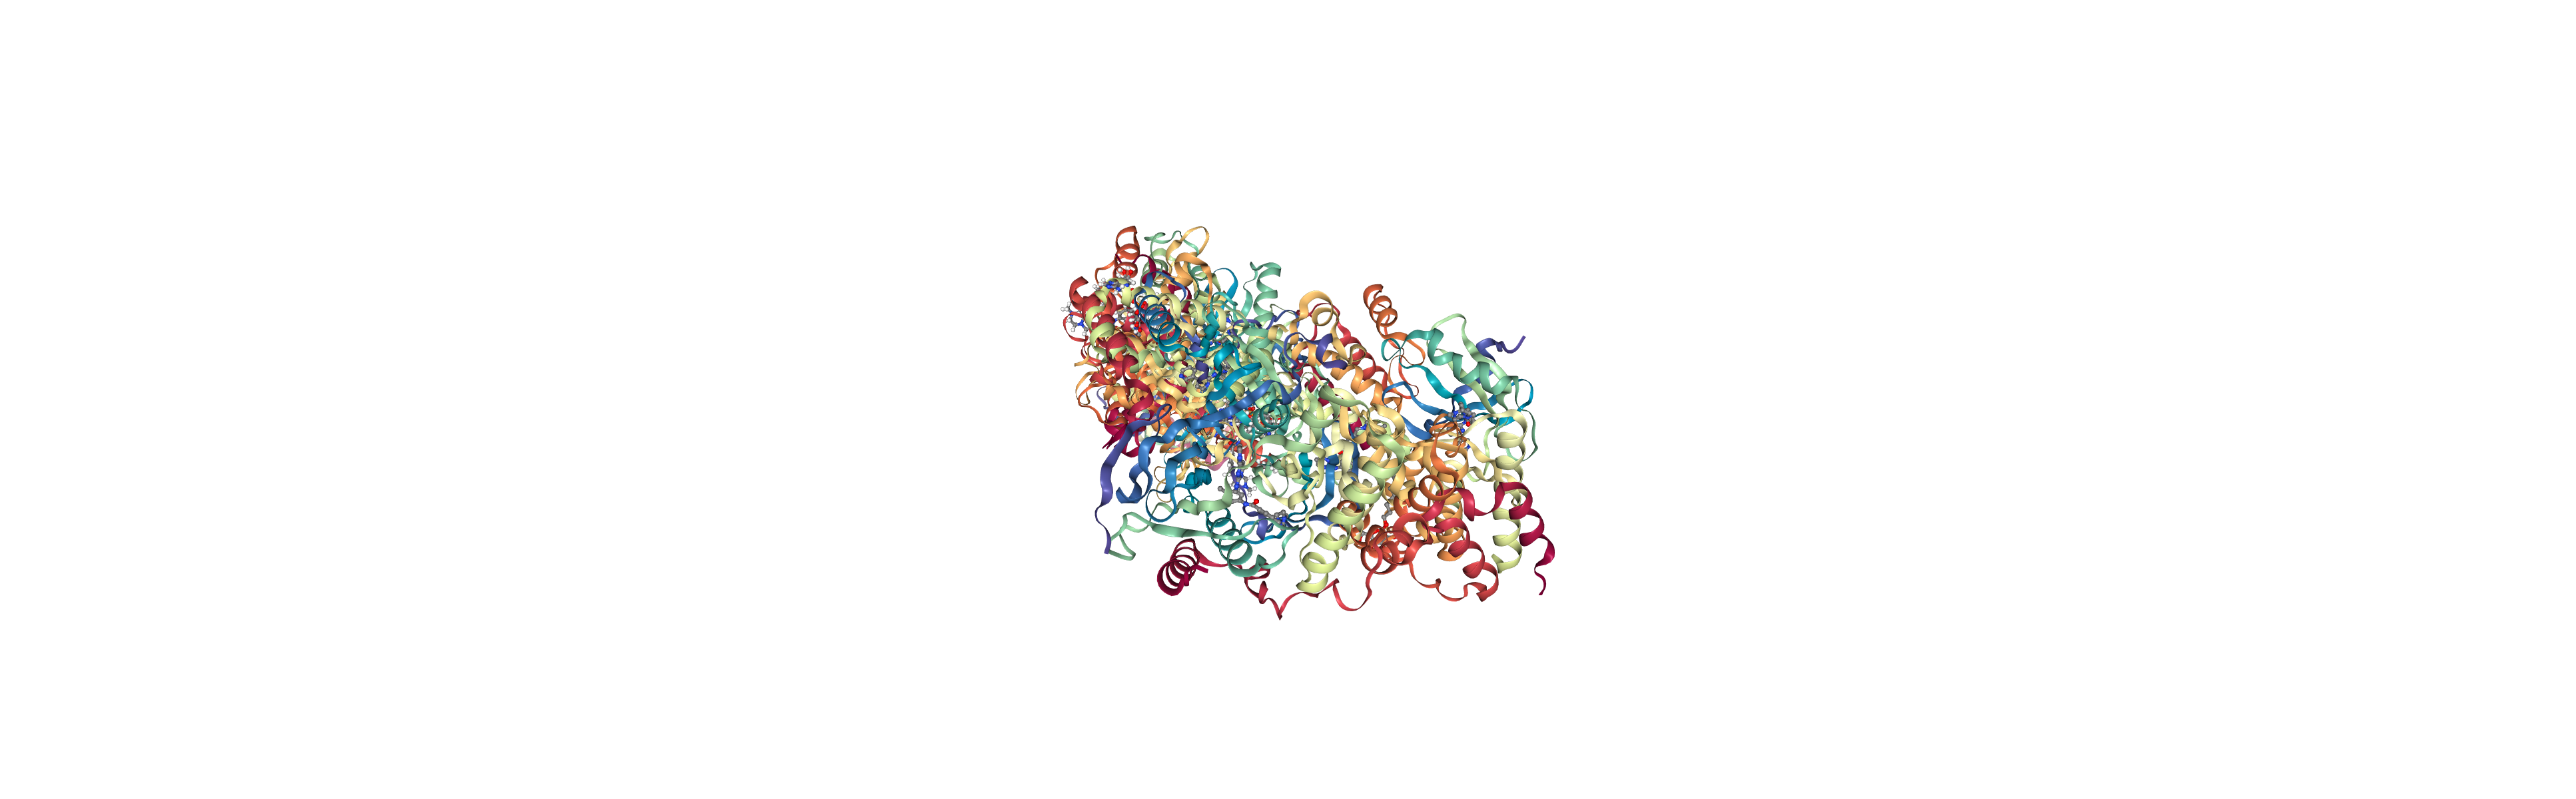

In [20]:
view._display_image()

Though this image is beautifully colorful and curly, it is not informative yet. We align the structures to each other in the next step.

### Align the PDB structures (whole protein)

We will use one of our packages, `opencadd` (`structure.superposition` module), to guide the structural alignment of the different proteins. The approach we will use is based on superposition guided by sequence alignment provided matched residues. There are other methods in the package, but this simple one will be enough to showcase some similarities.

Note: This approach biases the analysis towards structures with similar sequences. For an automated workflow (where we do not know the sequence or structural similarity of protein pairs) a solution could be to calculate the RMSD based on all three measures and retain the best for further analysis.

First, we show the alignment of all structures to the first structure in the list `pdb_ids`.

__Note:__ `opencadd` (`structure.superposition` module) is still in alpha stage, so we have to install it manually while there's no `conda` package available. Enable the following cell to proceed manually.

In [21]:
from opencadd.structure.superposition.api import align, METHODS
from opencadd.structure.core import Structure
# Disable some unneeded warnings
import logging
logger = logging.getLogger("opencadd")
logger.setLevel(logging.ERROR)

In [22]:
# Download PDB 
structures = [Structure.from_pdbid(pdb_id) for pdb_id in pdb_ids]
# Strip solvent and other artifacts of crystallography
proteins = [Structure.from_atomgroup(s.select_atoms('protein')) for s in structures]

In [23]:
results = align(proteins, method=METHODS["mda"])

In [24]:
view = nv.NGLWidget()
for protein in proteins:
    view.add_component(protein.atoms)
view

NGLWidget()

In [25]:
view.render_image();

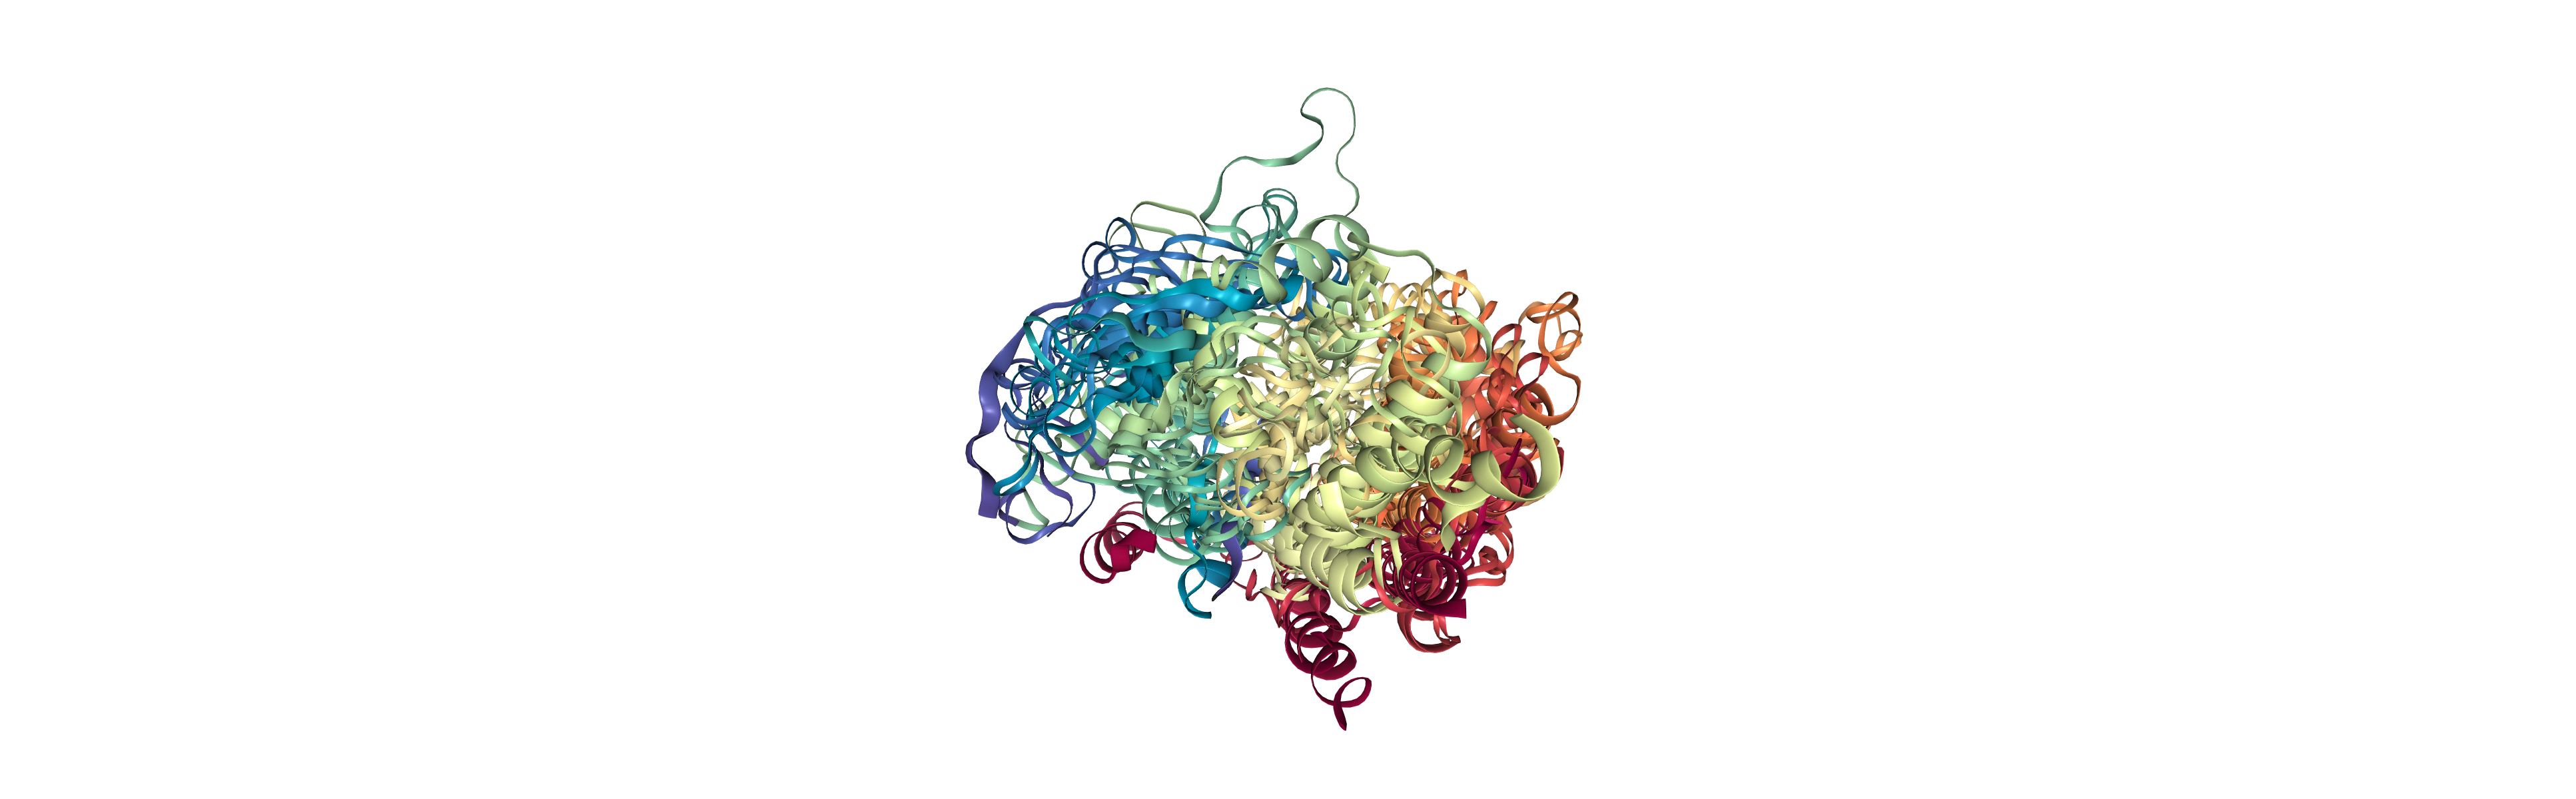

In [26]:
view._display_image()

The structural alignment for many e.g. helices is high, whereas lower or poor for others. `opencadd` (`structure.superposition` module) returns several scores for the alignment under the `scores` key.

In [27]:
from MDAnalysis.analysis import rms
from opencadd.structure.superposition.engines.mda import MDAnalysisAligner

def calc_rmsd(A, B):
    aligner = MDAnalysisAligner()
    selection, _ = aligner.matching_selection(A, B)
    A = A.select_atoms(selection['reference'])
    B = B.select_atoms(selection['mobile'])
    return rms.rmsd(A.positions, B.positions, superposition=False)

def calc_rmsd_matrix(structures, names):
    values = {name: {} for name in names}
    for A, name_i in zip(structures, names):
        for B, name_j, in zip(structures, names):
            values[name_i][name_j] = calc_rmsd(A, B)
    df = pd.DataFrame.from_dict(values)
    return df

In [28]:
rmsd_matrix = calc_rmsd_matrix(proteins, pdb_ids)
rmsd_matrix

3HEC       2PL0       4CSV       4R7I       1XBB       3FW1  \
3HEC   0.000000  16.091148  12.606877  20.531278  17.201069  23.671867   
2PL0  16.091148   0.000000   3.664537  13.501442   7.521946  22.797072   
4CSV  12.606877   3.664537   0.000000  13.956163   7.776430  22.469151   
4R7I  20.531278  13.501442  13.956163   0.000000  11.881647  21.927079   
1XBB  17.201069   7.521946   7.776430  11.881647   0.000000  22.235981   
3FW1  23.671867  22.797072  22.469151  21.927079  22.235981   0.000000   
1T46  21.656061  14.063316  14.553660   3.212093  12.592919  21.607311   

           1T46  
3HEC  21.656061  
2PL0  14.063316  
4CSV  14.553660  
4R7I   3.212093  
1XBB  12.592919  
3FW1  21.607311  
1T46   0.000000

We visualize the results of this RMSD refinement as heatmap.

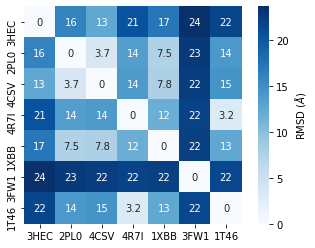

In [29]:
# Make sure matplotlib version >= 3.1.2; otherwise you'll get Y-cropped heatmaps
sns.heatmap(rmsd_matrix, linewidths=0, annot=True, square=True, cbar_kws={"label": "RMSD ($\AA$)"}, cmap="Blues");

We cluster the heatmap in order to see protein similarity based on the RMSD refinement.

In [30]:
def plot_clustermap(rmsd, title):
    g = sns.clustermap(rmsd, linewidths=1, annot=True, cbar_kws={"label": "RMSD ($\AA$)"}, cmap="Blues")
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    sns.set(font_scale=1.5)
    
    # Save plot - use bbox_inches to include text boxes:
    # https://stackoverflow.com/questions/44642082/text-or-legend-cut-from-matplotlib-figure-on-savefig?rq=1
    plt.savefig(f"data/bsc_{title}.png", dpi=300, bbox_inches="tight", transparent=True)
    return plt.gcf()

/home/dominique/.local/miniforge3/envs/teachopencadd/lib/python3.7/site-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


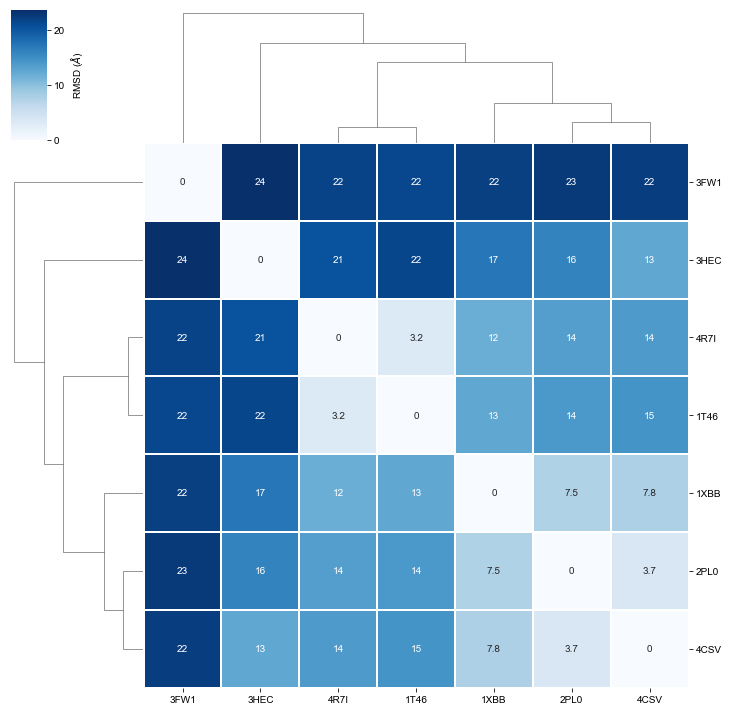

In [31]:
plot_clustermap(rmsd_matrix, "protein");

The RMSD comparison shows that one protein differs from the other proteins, i.e. 3FW1. Let's try to understand by checking which proteins we have in our dataset.

Proteins are classified by the chemical reactions they catalyze with so called EC (Enzyme Commission) numbers, which we will use here to check the enzymatic groups the proteins belong to.

In [32]:
# Get EC numbers for PDB IDs from PDB
pdb_all_info = [get_all_info(pdb_id) for pdb_id in pdb_ids]
ec_numbers = [i["polymer"]["enzClass"]["@ec"] for i in pdb_all_info]
target_set = {"pdb_id": pdb_ids,
              "ec_number": ec_numbers}
target_set = pd.DataFrame(target_set)
target_set

pdb_id  ec_number
0   3HEC  2.7.11.24
1   2PL0   2.7.10.2
2   4CSV   2.7.10.2
3   4R7I   2.7.10.1
4   1XBB   2.7.10.2
5   3FW1   1.10.5.1
6   1T46   2.7.10.1

We can see that 3FW1, the human quinone reductase 2 (NQO2), belongs to EC class 1, i.e. oxidoreductases, whereas the other proteins belong to class 2.7, i.e. phosphorus transferases, which contain the tyrosine kinases (EC 2.7.10.2), the designated targets for Imatinib. 3FW1 is a reported off-target "with potential implications for drug design and treatment of chronic myelogenous leukemia in patients" ([<i>BMC Struct. Biol.</i> (2009), <b>9</b>, 10.1186/1472-6807-9-7](https://bmcstructbiol.biomedcentral.com/articles/10.1186/1472-6807-9-7)).

### Align PDB structures (binding sites)

So far we have used the whole protein structure for the alignment and RMSD refinement. However, the ligand binds only at the protein binding site and therefore the similarity of binding sites rather than of whole protein structures is a more putative basis for off-target prediction. 

We define a binding site of a protein by selecting all residues that are within 10 &#8491; of any ligand atom. These binding site residues are used for alignment and only their C&#593; atoms (protein backbone) are used for the RMSD refinement. Here, we show the alignment of all structures to the first structure in the list `pdb_ids`.

Note that for the aligner to work, whole residues must be selected as part of the distance search, hence the need for the `same residue as (...)` query.

In [33]:
binding_sites = [Structure.from_atomgroup(s.select_atoms("same residue as (resname STI or (around 10 resname STI))")) 
                 for s in structures]

In [34]:
view = nv.NGLWidget()
for binding_site in binding_sites:
    view.add_component(binding_site.atoms)
view

NGLWidget()

In [35]:
view.render_image();

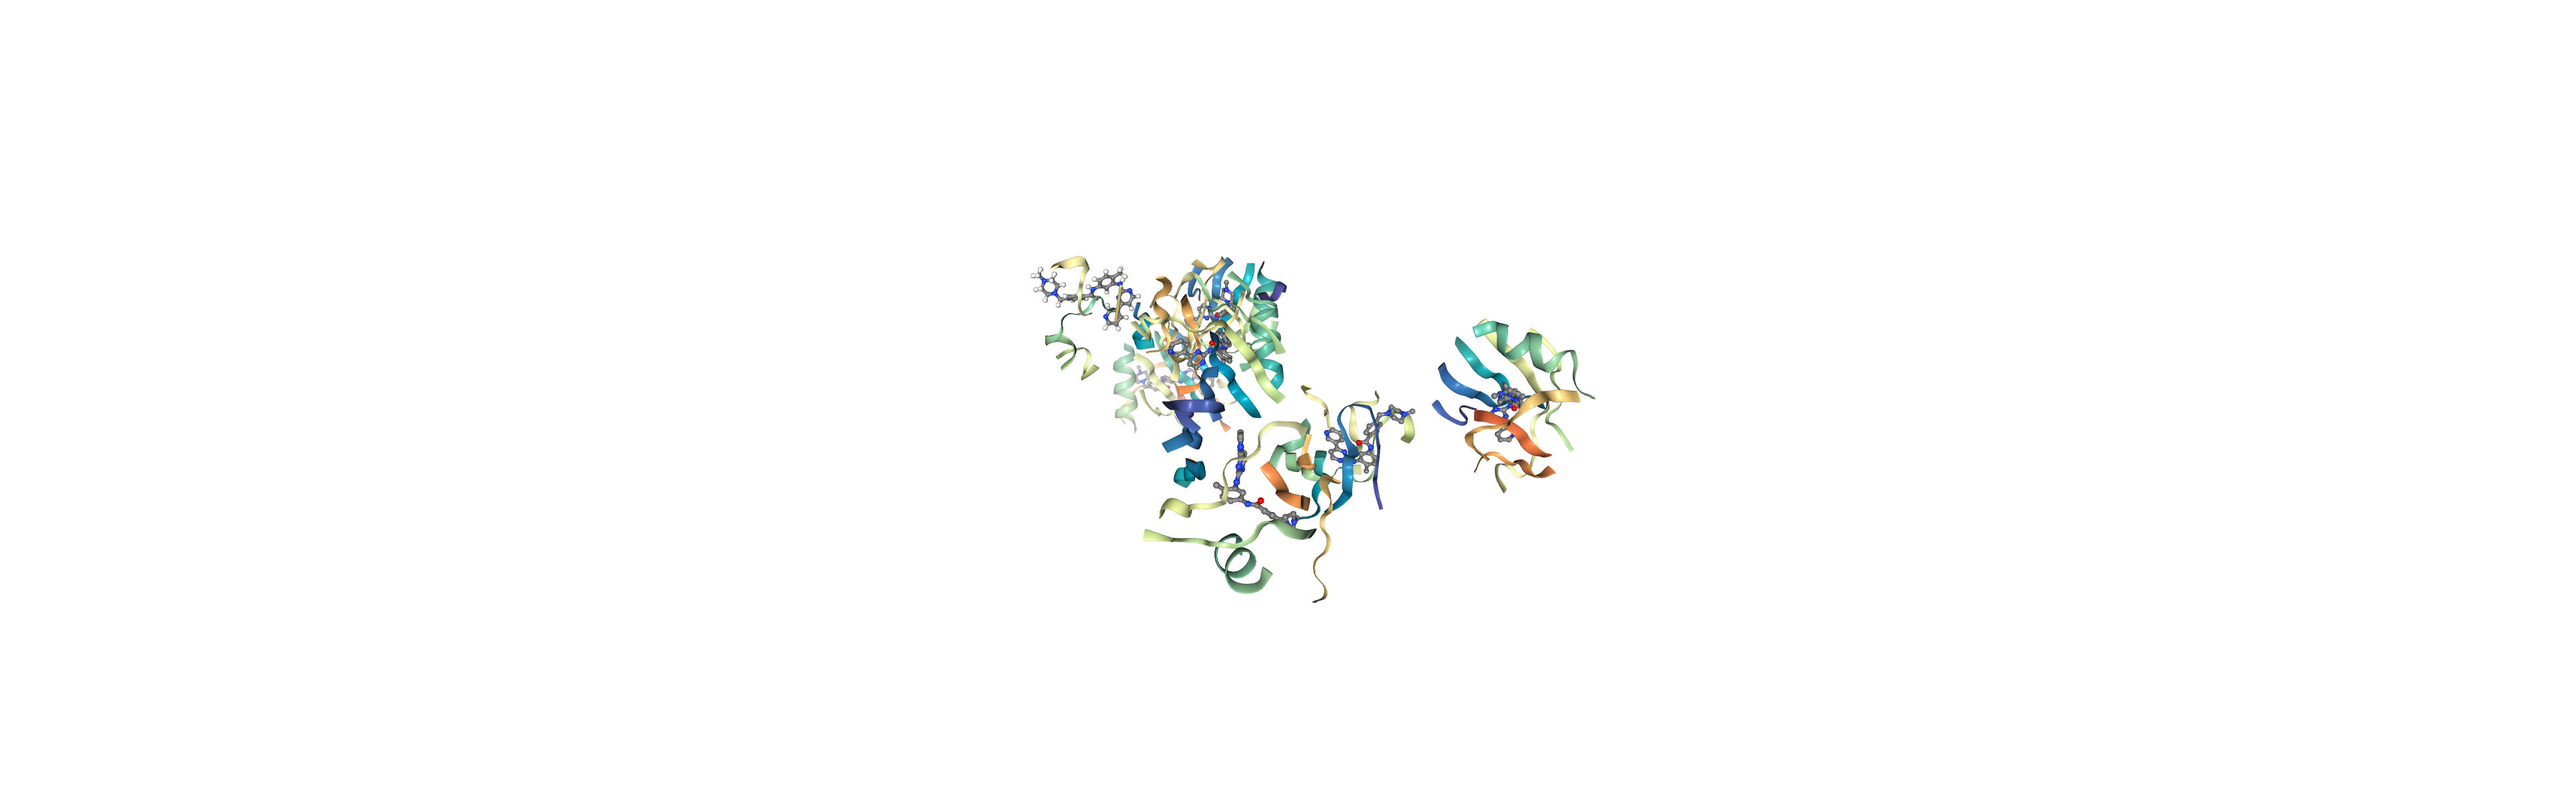

In [36]:
view._display_image()

In [37]:
results_binding_sites = align(binding_sites, method=METHODS["mda"])

In [38]:
view = nv.NGLWidget()
for binding_site in binding_sites:
    view.add_component(binding_site.atoms)
view

NGLWidget()

In [39]:
view.render_image();

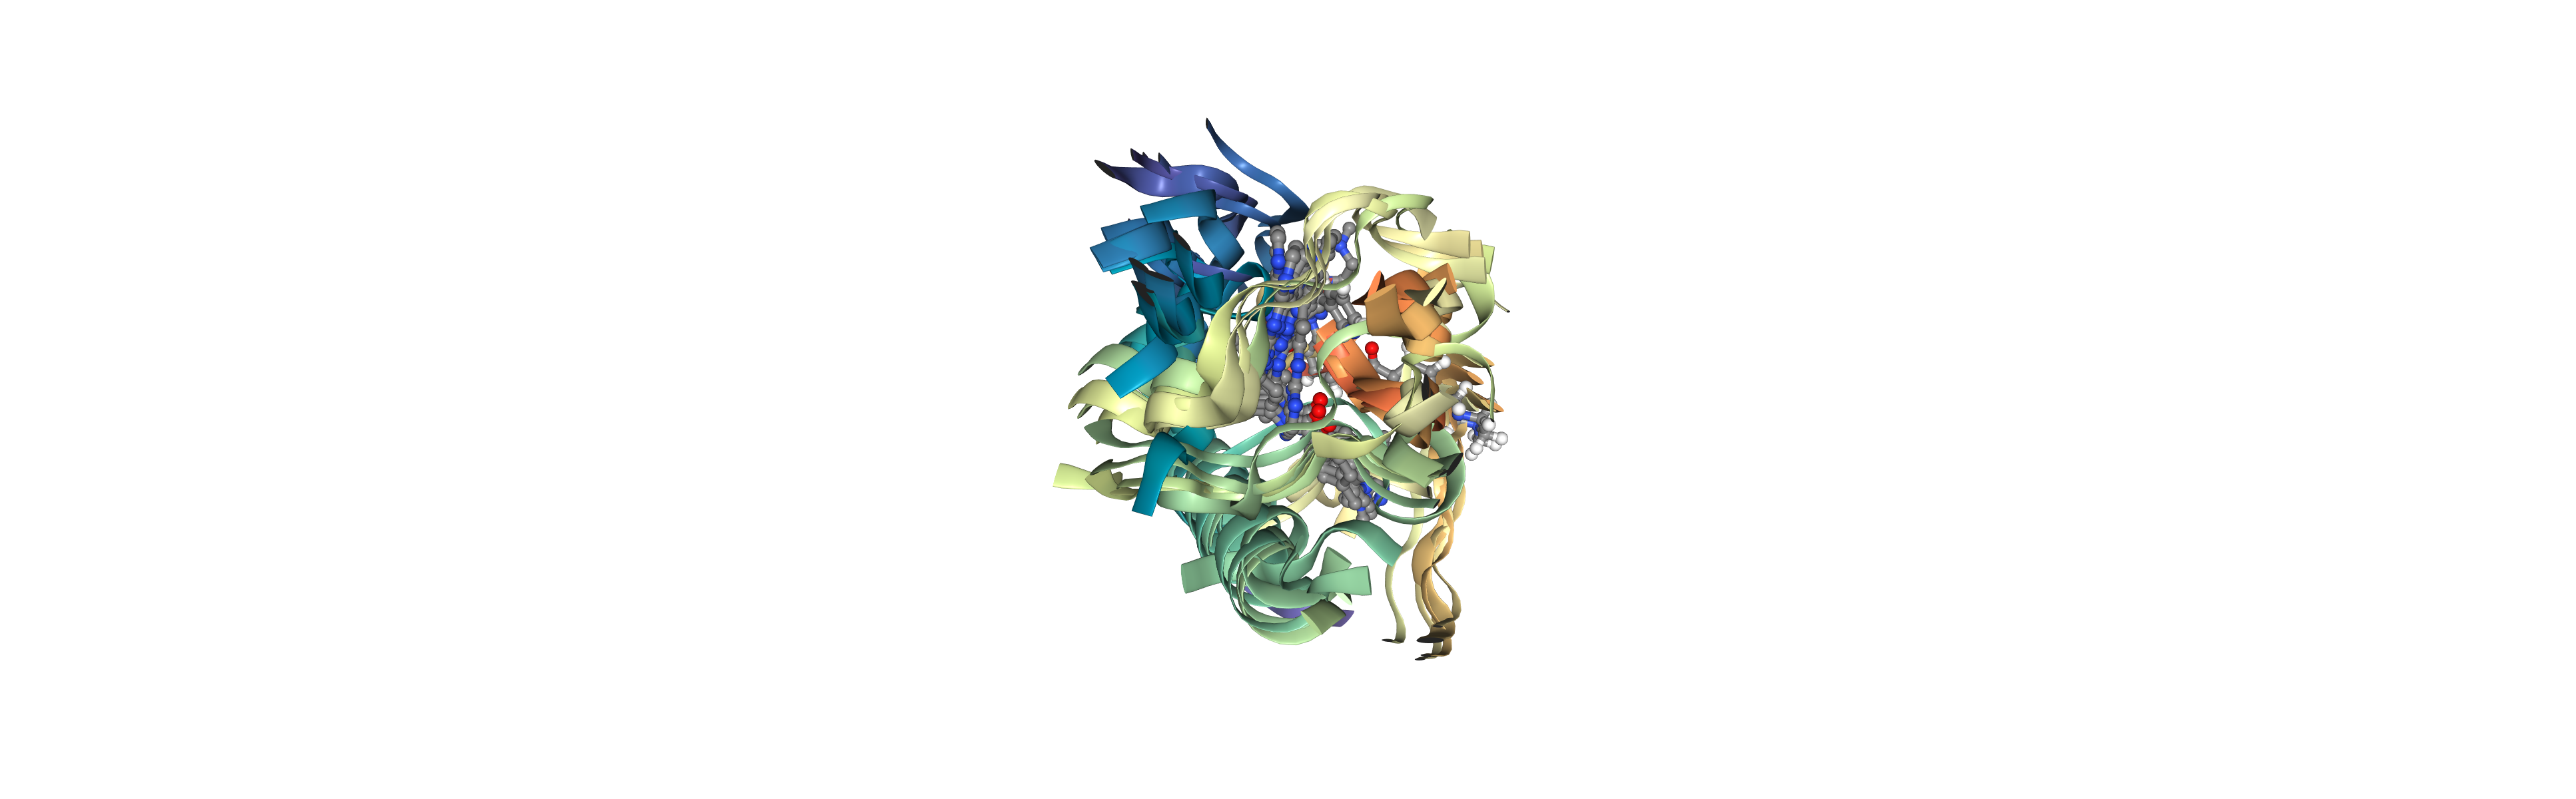

In [40]:
view._display_image()

### Get pairwise RMSD (binding sites)

In [41]:
rmsd_matrix_bs = calc_rmsd_matrix(binding_sites, pdb_ids)
rmsd_matrix_bs

3HEC       2PL0       4CSV       4R7I       1XBB       3FW1  \
3HEC   0.000000   6.155734   4.583946   5.700340  12.312706  14.955582   
2PL0   6.155734   0.000000   4.024773   3.997050  11.662433  11.338647   
4CSV   4.583946   4.024773   0.000000   5.185894  10.743658  13.900750   
4R7I   5.700340   3.997050   5.185894   0.000000  10.523855  14.453825   
1XBB  12.312706  11.662433  10.743658  10.523855   0.000000  13.477687   
3FW1  14.955582  11.338647  13.900750  14.453825  13.477687   0.000000   
1T46   9.768832   4.338103   5.851501   2.684484  11.111881  15.308169   

           1T46  
3HEC   9.768832  
2PL0   4.338103  
4CSV   5.851501  
4R7I   2.684484  
1XBB  11.111881  
3FW1  15.308169  
1T46   0.000000

We show the clustered heatmap for the RMSD results.

/home/dominique/.local/miniforge3/envs/teachopencadd/lib/python3.7/site-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


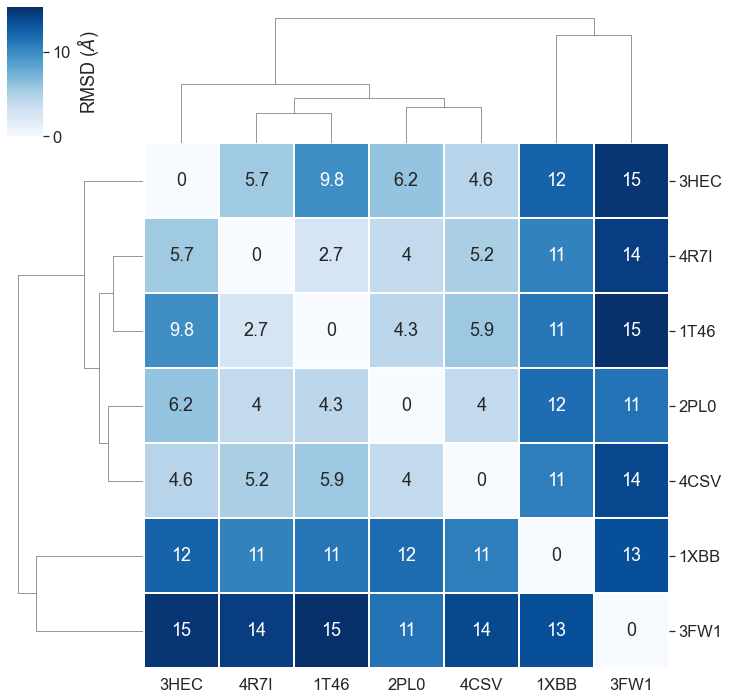

In [42]:
# Show the pairwise RMSD values as clustered heatmap
plot_clustermap(rmsd_matrix_bs, "bs");

What are the key observations in this heatmap?

- As seen already for the *full protein* comparison, also the *binding site* comparison reveals the comparatively highest dissimilarity for `3FW1`. Since `3FW1` is the only structure in our dataset representing not a kinase, we are content that our similarity measure was able to spot this. As discussed before, the human quinone reductase 2 (`3FW1`) is a reported off-target for Imatinib.
- Also the kinase `1XBB` shows a higher dissimilarity compared to the other kinases. This can be explained by `1XBB` being resolved in a different conformation (DFG-in) than the other kinases (DFG-out). The DFG motif is an important structural element in kinases, defining whether a kinase is active (DFG-in conformation) or inactive (DFG-out conformation). Note: DFG conformations of kinase structures can be looked up e.g. on the KLIFS database: https://klifs.vu-compmedchem.nl
- The remaining structures are comparatively similar to each other, which we would expect since they all represent kinases in the overall same conformation.

Note that RMSD values as calculated here are dependent on the residue selection (binding site definition) and the quality of the a priori sequence alignment.

### Filter out unwanted alignments

For a cleaner depiction of the most similar structures, we can filter `3FW1` and `1XBB` out and re-run the binding site comparison.

In [46]:
filtered_structures = []
filtered_pdb_ids = []
for name, structure in zip(pdb_ids, structures):
    if name not in ("3FW1", "1XBB"):
        filtered_structures.append(structure)
        filtered_pdb_ids.append(name)

In [47]:
filtered_binding_sites = [Structure.from_atomgroup(s.select_atoms("same residue as (resname STI or (around 10 resname STI))")) 
                          for s in filtered_structures]

In [48]:
view = nv.NGLWidget()
for binding_site in filtered_binding_sites:
    view.add_component(binding_site.atoms)
view

NGLWidget()

In [49]:
view.render_image();

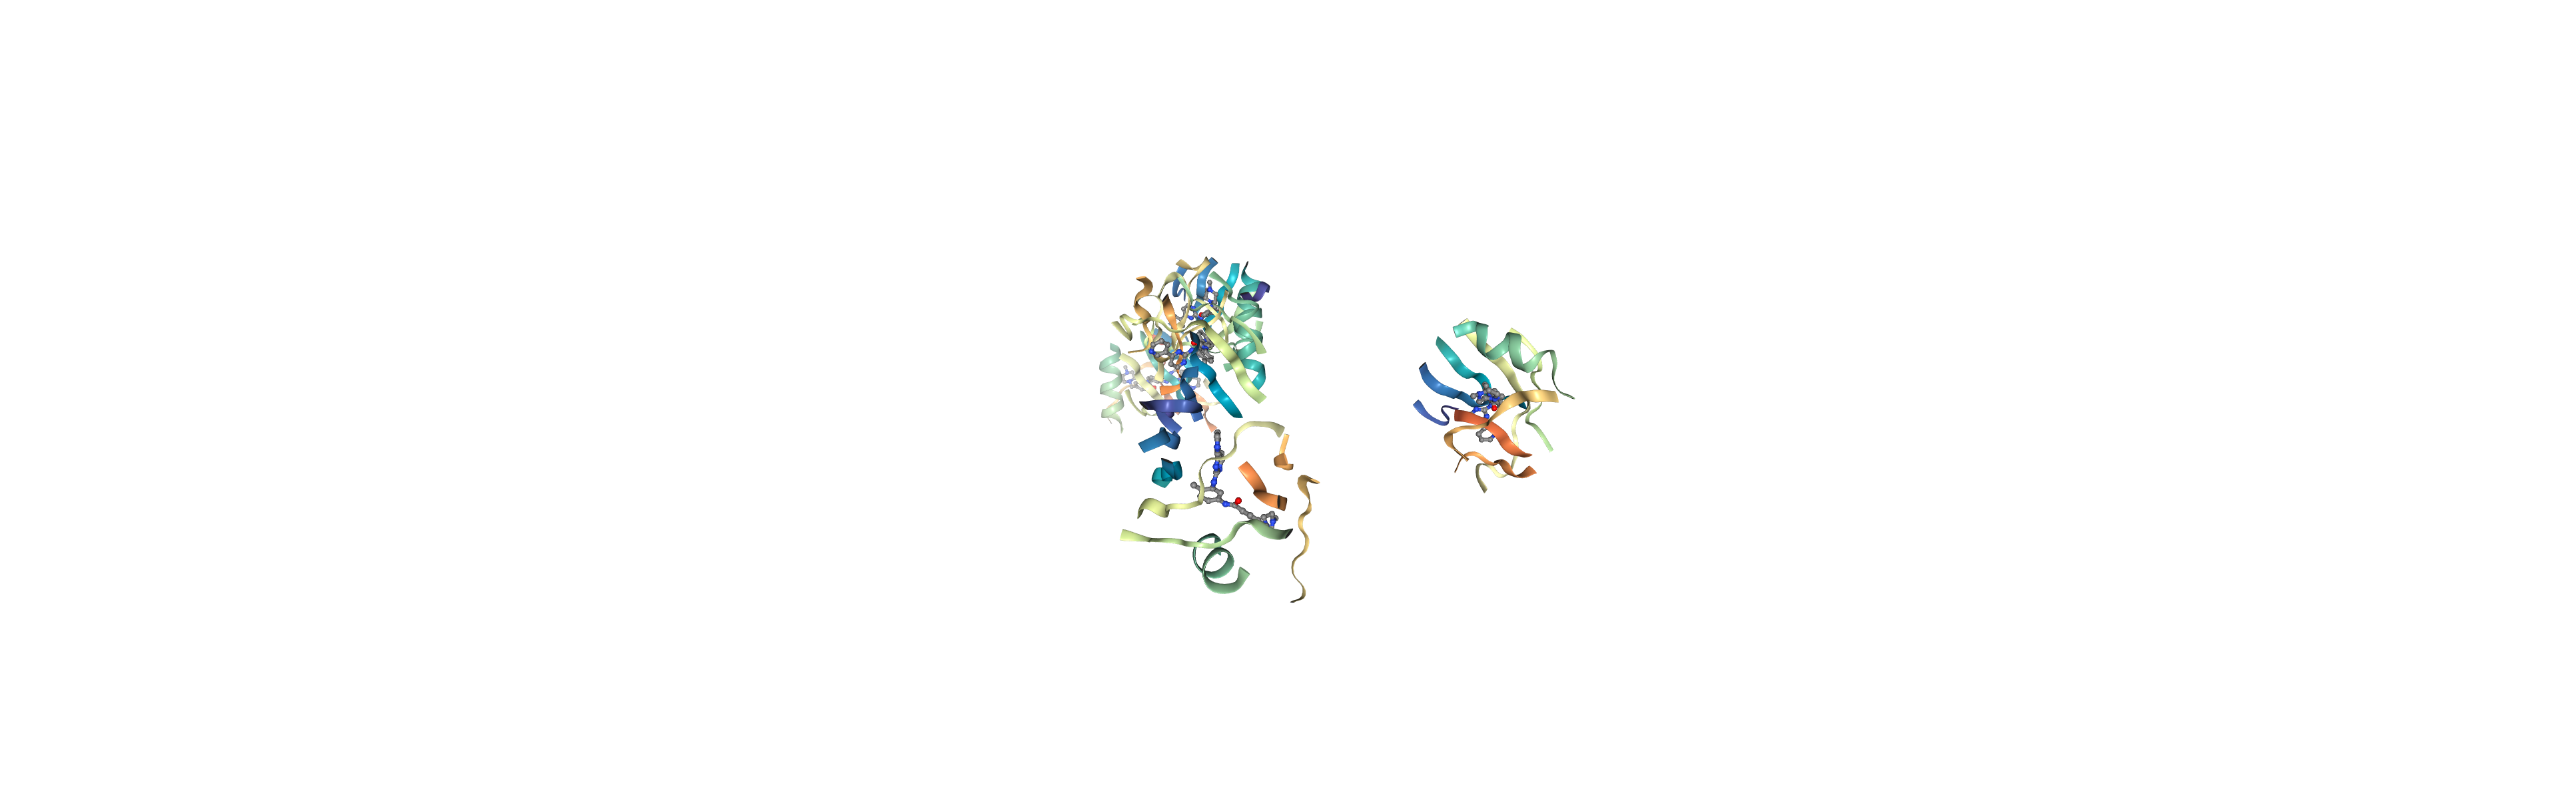

In [50]:
view._display_image()

In [51]:
filtered_results_binding_sites = align(filtered_binding_sites, method=METHODS["mda"])

In [52]:
view = nv.NGLWidget()
for binding_site in filtered_binding_sites:
    view.add_component(binding_site.atoms)
view

NGLWidget()

In [53]:
view.render_image();

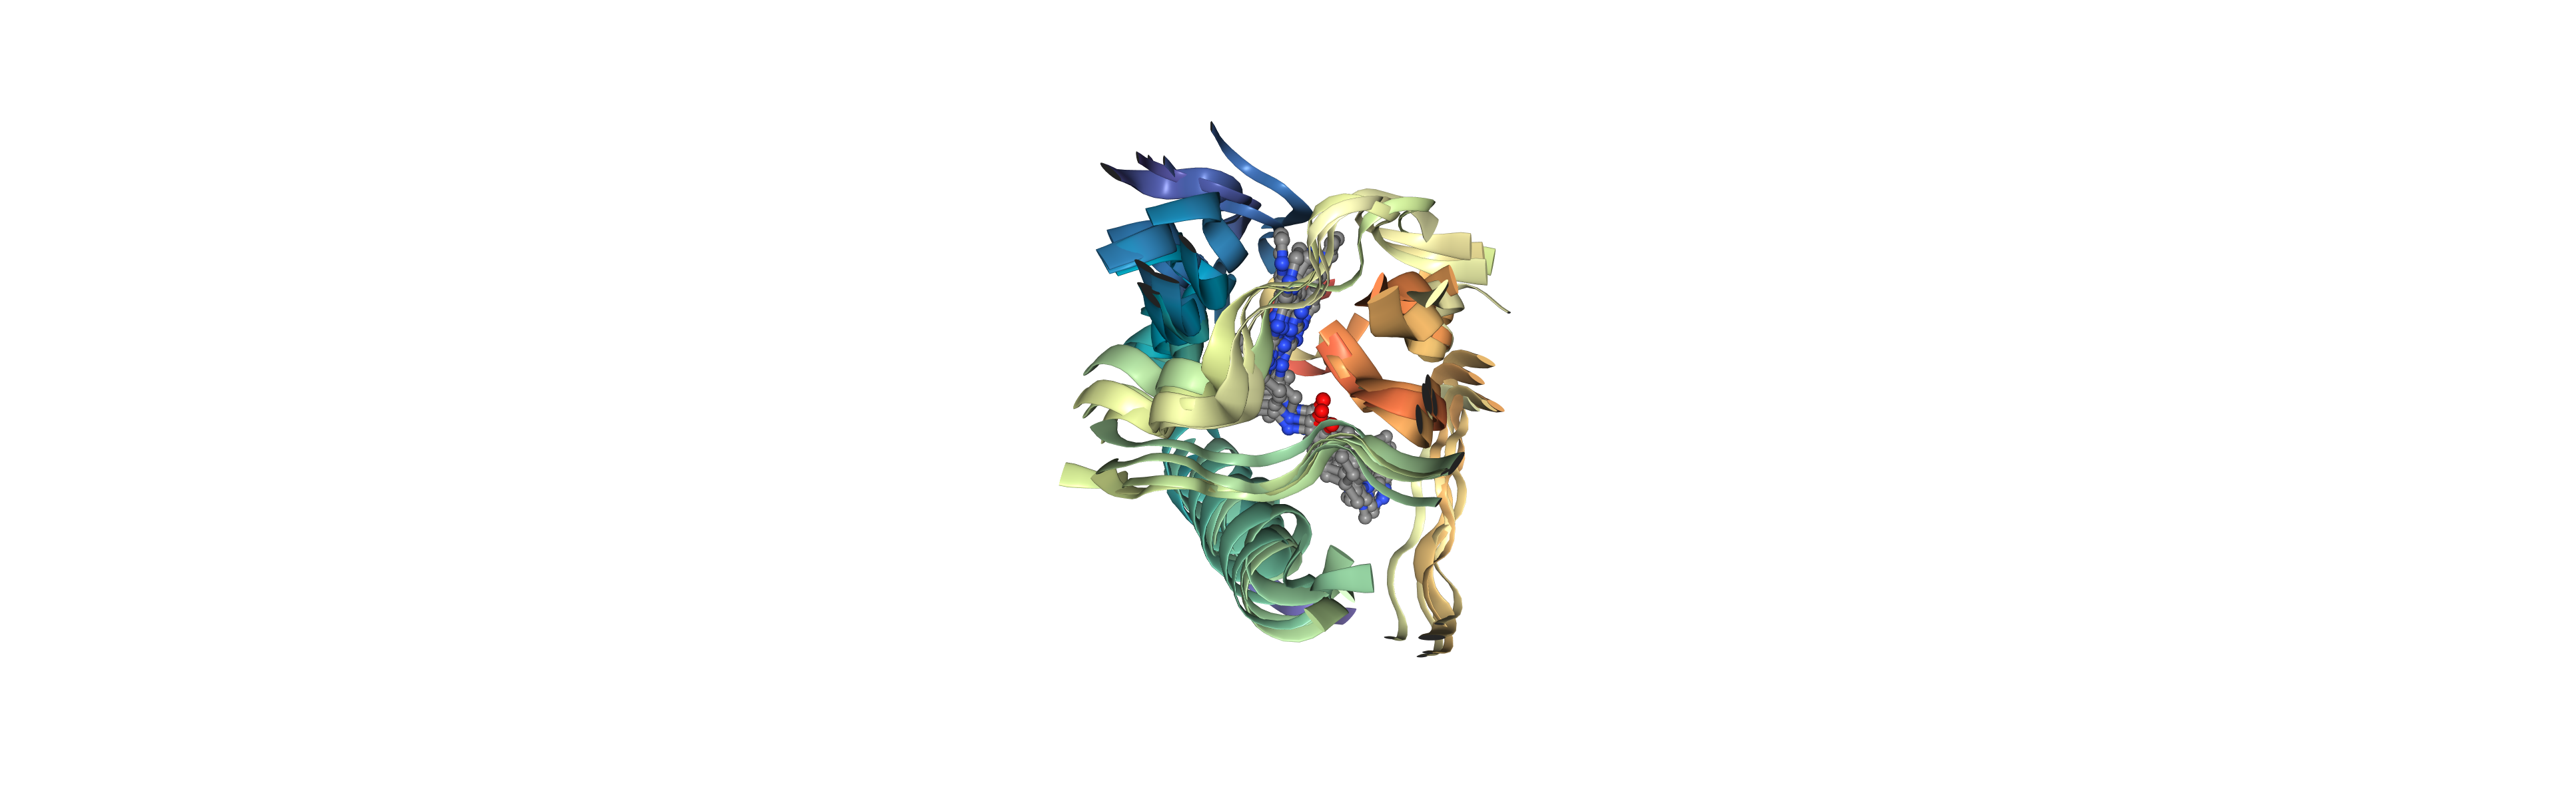

In [54]:
view._display_image()

In [55]:
filtered_rmsd_matrix_bs = calc_rmsd_matrix(filtered_binding_sites, filtered_pdb_ids)
filtered_rmsd_matrix_bs

3HEC      2PL0      4CSV      4R7I      1T46
3HEC  0.000000  6.155734  4.583946  5.700340  9.768832
2PL0  6.155734  0.000000  4.024773  3.997050  4.338103
4CSV  4.583946  4.024773  0.000000  5.185894  5.851501
4R7I  5.700340  3.997050  5.185894  0.000000  2.684484
1T46  9.768832  4.338103  5.851501  2.684484  0.000000

/home/dominique/.local/miniforge3/envs/teachopencadd/lib/python3.7/site-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


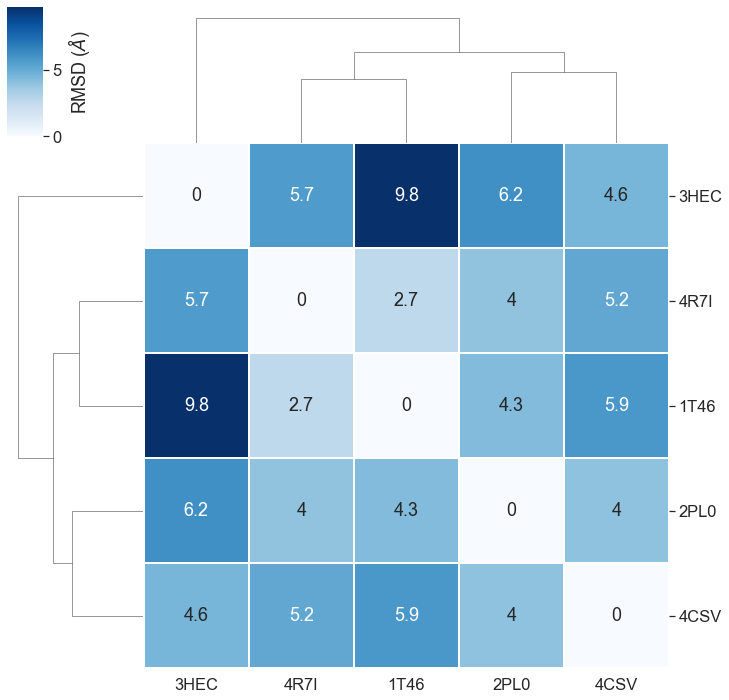

In [56]:
plot_clustermap(filtered_rmsd_matrix_bs, "bs");

Much better!

## Discussion

In this talktorial, we have used a simple comparison approach, i.e. sequence alignment and subsequent RMSD refinement of (i) whole proteins and (ii) binding sites, to assess the similarity and dissimilarity of a small set of structures showing Imatinib-binding proteins. 
We were able to spot in our set an off-target for Imatinib (highest dissimilarity) and a kinase resolved in a different conformation compared to the rest of the kinases (also with a relatively high dissimilarity). 
Given our simple approach, we are content with these results!

In a real case scenario, off-targets for Imatinib would be predicted by comparing the binding site of an intended target of Imatinib (a tyrosine kinase) with a large database of resolved structures (PDB). 
Since this results in the comparison of sequences also with low similarity, more sophisticated methods should be invoked
that use a sequence-independent alignment algorithm and that include the physico-chemical properties of the binding site in order to enable a more sophisticated search.

## Quiz

1. Explain the terms on- and off-targets of a drug.
2. Explain why binding site similarity can be used to find off-targets to a query target.
3. Discuss how useful the RMSD value of (i) whole proteins and (ii) protein binding sites is for off-target prediction.
4. Think of alternate approaches for binding site information (how to encode a binding site for binding site comparison?).